In [ ]:
#Page 102 of PATI
#A good example of how we can measure intraday momemtum in various time frames
# Most importantly, here it is shown, how to resample the date to any timeframe from 1min TF
#  This is really helpful to understand which TF works best 

In [28]:
import pandas as pd
import numpy as np

In [29]:
#file name
fn = 'XAU1minTest.csv'

In [30]:
data = pd.read_csv(fn, index_col=0, parse_dates=True)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         205 non-null    object 
 1   open         205 non-null    float64
 2   high         205 non-null    float64
 3   low          205 non-null    float64
 4   close        205 non-null    float64
 5   tick_volume  205 non-null    int64  
 6   spread       205 non-null    int64  
 7   real_volume  205 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 14.4+ KB


,time,open,high,low,close,tick_volume,spread,real_volume
0,11/06/2004 07:18,384.0,384.1,384.0,384.0,3,0,0
1,11/06/2004 07:23,384.1,384.1,384.0,384.0,2,0,0
2,11/06/2004 07:24,383.8,383.8,383.8,383.8,1,0,0
3,11/06/2004 07:25,383.8,384.3,383.8,384.3,3,0,0
4,11/06/2004 07:27,383.8,383.8,383.8,383.8,1,0,0


In [31]:
data['returns'] = np.log(data['close'] / data['close'].shift(1))
data.tail(5)

,time,open,high,low,close,tick_volume,spread,real_volume,returns
200,11/06/2004 17:33,384.1,384.1,384.1,384.1,1,0,0,-0.000521
201,11/06/2004 17:57,383.8,383.8,383.8,383.8,1,0,0,-0.000781
202,11/06/2004 18:38,384.3,384.3,384.3,384.3,1,0,0,0.001302
203,11/06/2004 18:41,384.3,384.3,384.3,384.3,1,0,0,0.000000
204,11/06/2004 18:46,384.1,384.1,384.1,384.1,1,0,0,-0.000521


C:\Users\MIG\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


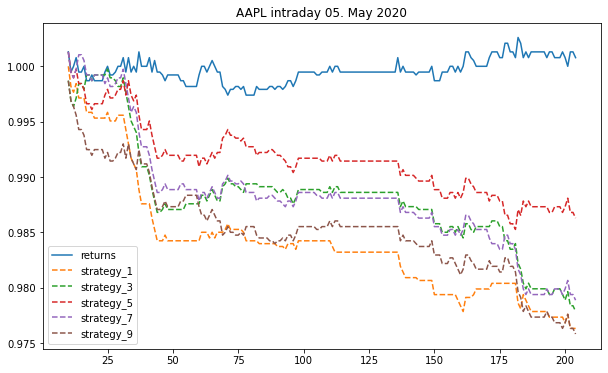

In [32]:
to_plot = ['returns']

for m in [1, 3, 5, 7, 9]: 
    data['position_%d' % m] = np.sign(data['returns'].rolling(m).mean()) 
    data['strategy_%d' % m] = (data['position_%d' % m].shift(1) * data['returns']) 
    to_plot.append('strategy_%d' % m)

#print(data.head(20))
#print(to_plot)
# Interesting --- Just 1 line code to plot
data[to_plot].dropna().cumsum().apply(np.exp).plot( title='AAPL intraday 05. May 2020', figsize=(10, 6), style=['-', '--', '--', '--', '--', '--']);
